In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Sample - Superstore.xlsx', sheet_name="Orders")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
print('* There are stores in {} states'.format(len(df['State'].unique())))
print('* The are {} different products'.format(len(df['Product ID'].unique())))
print('* There are {} different categories'.format(len(df['Category'].unique())))
print('* There are {} different sub categories'.format(len(df['Sub-Category'].unique())))
print('* There are {} different ship mode'.format(len(df['Ship Mode'].unique())))

* There are stores in 49 states
* The are 1862 different products
* There are 3 different categories
* There are 17 different sub categories
* There are 4 different ship mode


In [10]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [14]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [15]:
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


In [16]:
# # this function is to help group and plot sales by differnt features. The functions takes feature name and top classes in each gruop to plot
# def sales_plot_by_group(group, top=50, color='blue'):    
#     sales_by_group = df.groupby(group)['Sales'].sum().head(top)
#     sales_by_group.sort_values(ascending= False, inplace=True)
#     plt.figure(figsize = (15,4))
#     plt.title('Sales by {}'.format(group))
#     plt.ylabel('Sales in USD')
#     plt.bar(sales_by_group.index, sales_by_group, color=color, alpha = 0.5)
#     plt.xticks(rotation=90)
#     for x,y in sales_by_group.items():
#         plt.text(x,sales_by_group.max()/2, f'${int(y):,.0f}', rotation=90, horizontalalignment='center', fontsize=12)
#     plt.show

In [17]:
# sales_plot_by_group('State',20, color='blue') # plot sales per state and show 20 top states
# sales_plot_by_group('Region',color='red') # plot sales per region
# sales_plot_by_group('Category',color ='black') # plot sales by category
# sales_plot_by_group('Sub-Category',color='green') # plot sales by sub-category
# sales_plot_by_group('Segment',color='orange') # plot sales by segment
# sales_plot_by_group('Ship Mode',color='brown') # plot sales by ship mode
# sales_plot_by_group('Product Name', 20, color='blue') # plot sales by product name
# sales_plot_by_group('Customer Name',30, color='red') # plot sales by customer name

In [18]:
# def plot_trend_group(group,size, color='blue'):
#     sales_by_group = df.groupby(group)['Sales'].sum()
#     sales_by_group.sort_values(ascending= False, inplace=True)
#     sales_by_group.head(size)
#     fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
#     fig.suptitle('Sales trend by {}'.format(group), fontsize=18)
#     for ax,group_name in zip(axes.flat, sales_by_group.index):
#         sales_group = df[df[group]==group_name]
#         sales_group = sales_group.groupby('month')['Sales'].sum()
#         sales_group.index = sales_group.index.to_timestamp()
#         ax.tick_params(labelrotation=45)
#         ax.set_title(group_name, fontsize = 10)
#         ax.plot(sales_group, color=color)
#     fig.tight_layout()
# plot_trend_group('State',12)
# plot_trend_group('Region',3, 'red')
# plot_trend_group('Segment',3,'green')
# plot_trend_group('Category',3, 'orange')
# plot_trend_group('Sub-Category',12, 'black')
# plot_trend_group('Product Name',12,'red')

In [19]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Initialize Plotly in Jupyter Notebook mode
# import plotly.io as pio
# pio.renderers.default = 'notebook_connected'


# # Create a mapping for all 50 states 
# all_state_mapping = {
#     "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
#     "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
#     "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
#     "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
#     "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
#     "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
#     "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
#     "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
#     "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
#     "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
#     "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
# }

# # Add the Abbreviation column to the DataFrame
# df['Abbreviation'] = df['State'].map(all_state_mapping)

# # Group by state and calculate the sum of sales
# sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# # Add Abbreviation to sum_of_sales
# sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# # Create text for hover info
# text = []
# for state, sales, abbreviation in zip(sum_of_sales['State'], sum_of_sales['Sales'], sum_of_sales['Abbreviation']):
#     text.append(f'{state}<br>Total Sales: ${sales:.2f}<br>Abbreviation: {abbreviation}')

# # Create a choropleth map using Plotly
# fig = go.Figure(data=go.Choropleth(
#     locations=sum_of_sales['Abbreviation'],
#     locationmode='USA-states',
#     z=sum_of_sales['Sales'],
#     hoverinfo='text',
#     text=text,
#     colorscale='Magma',
#     colorbar_title="Total Sales ($)"
# ))

# fig.update_geos(projection_type="albers usa")
# fig.update_layout(
#     geo_scope='usa',
#     title='Total Sales by U.S. State'
# )

# fig.show()

In [20]:
sales_df = df.groupby('State').sum()
sales_df

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_11524\1108255793.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_df = df.groupby('State').sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,,
Alabama,243876,2195669,19510.6400,256,0.00,5786.8253
Arizona,1019876,19102126,35282.0010,862,68.00,-3427.9246
Arkansas,304575,4339309,11678.1300,240,0.00,4008.6871
California,10137449,184382639,457687.6315,7667,145.60,76381.3871
Colorado,797002,14613828,32108.1180,693,57.60,-6527.8579
Connecticut,444411,531005,13384.3570,281,0.60,3511.4918
Delaware,504370,1896504,27451.0690,367,0.60,9977.3748
District of Columbia,17918,200160,2865.0200,40,0.00,1059.5893
Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017


In [35]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))

monthly_sales.head()

,Sales,time
month,,
2014-01,14236.895,0
2014-02,4519.892,1
2014-03,55691.009,2
2014-04,28295.345,3
2014-05,23648.287,4


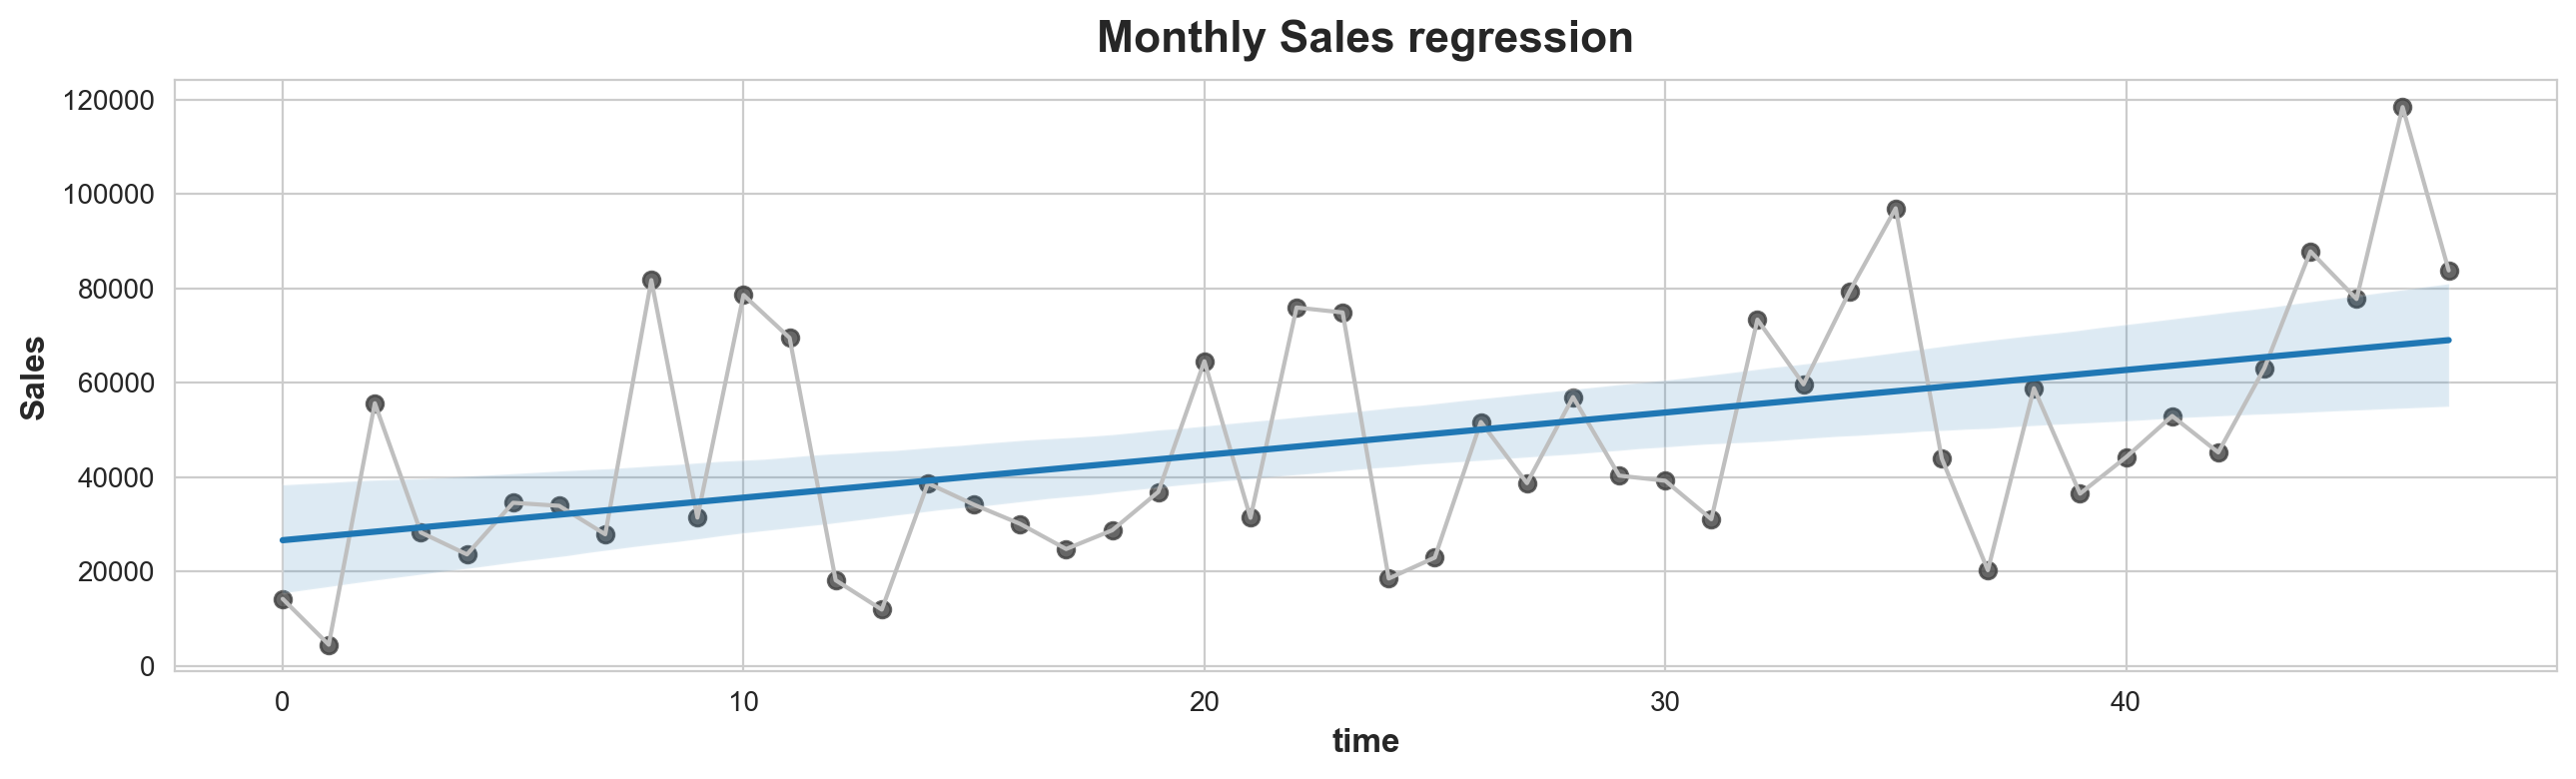

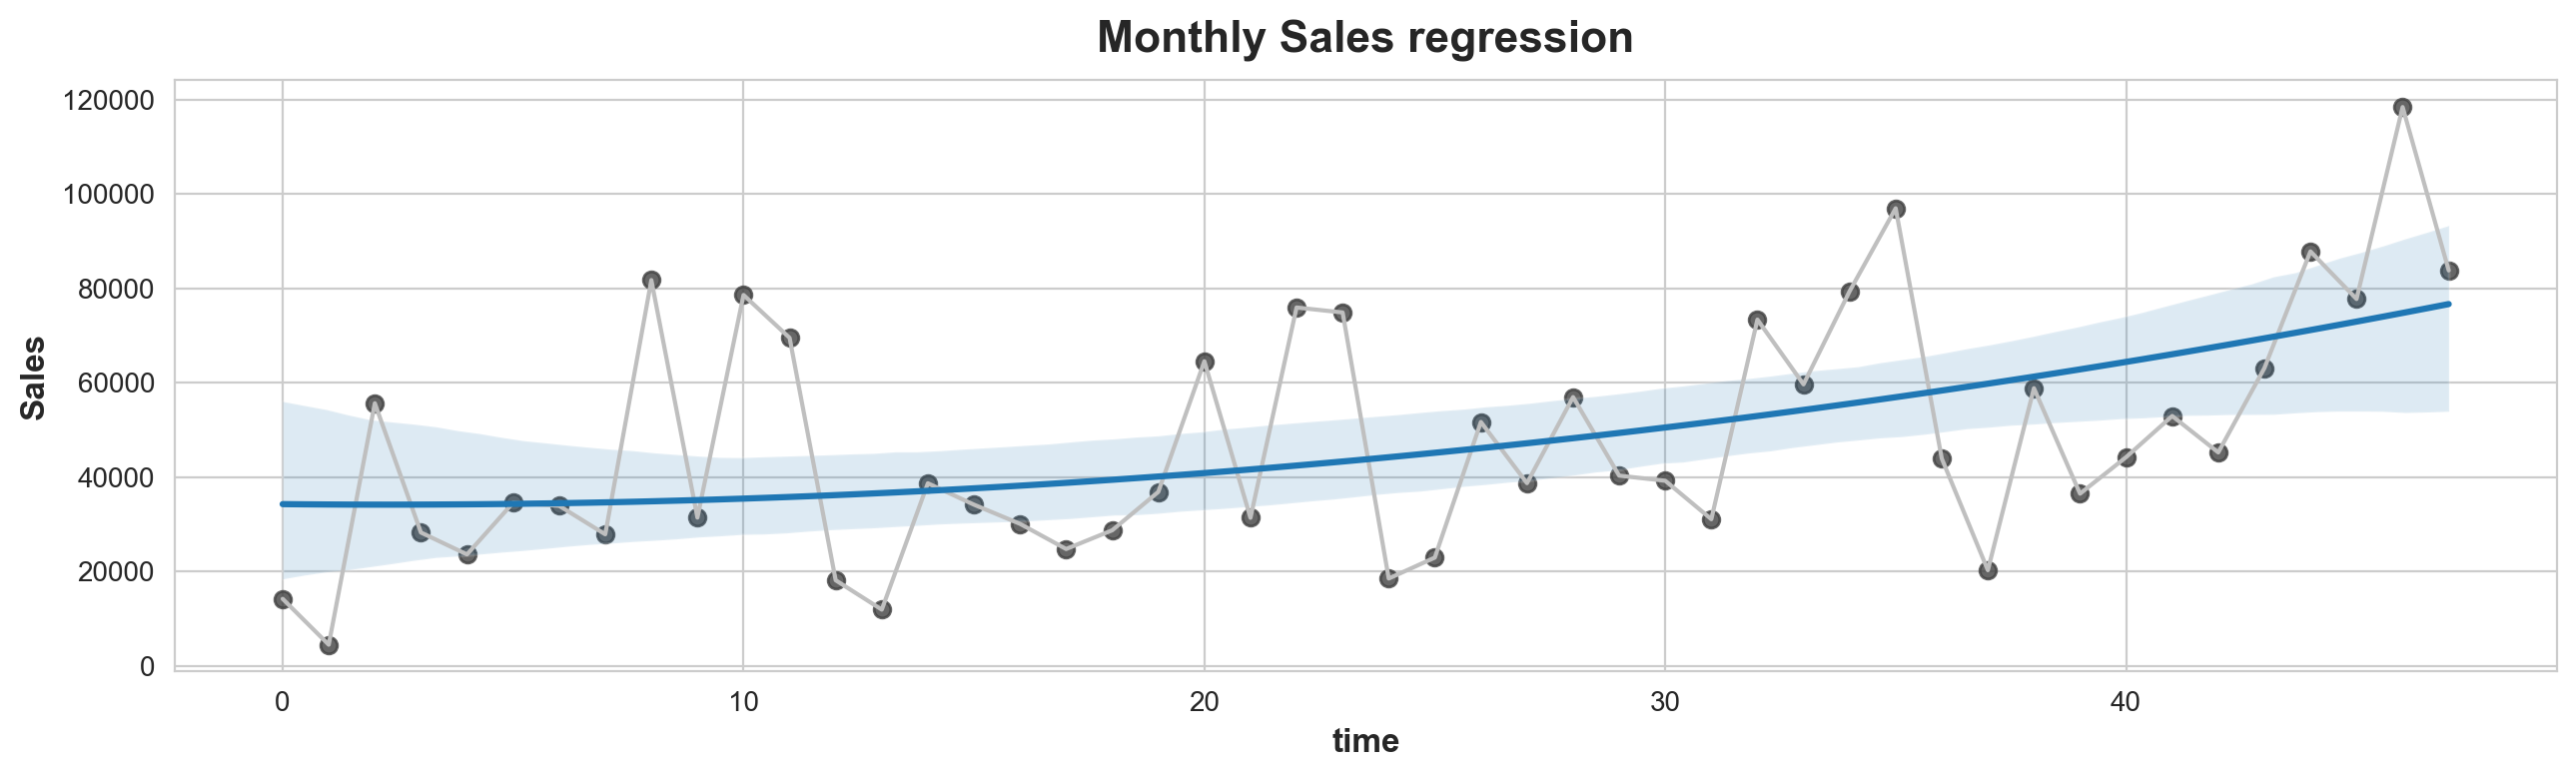

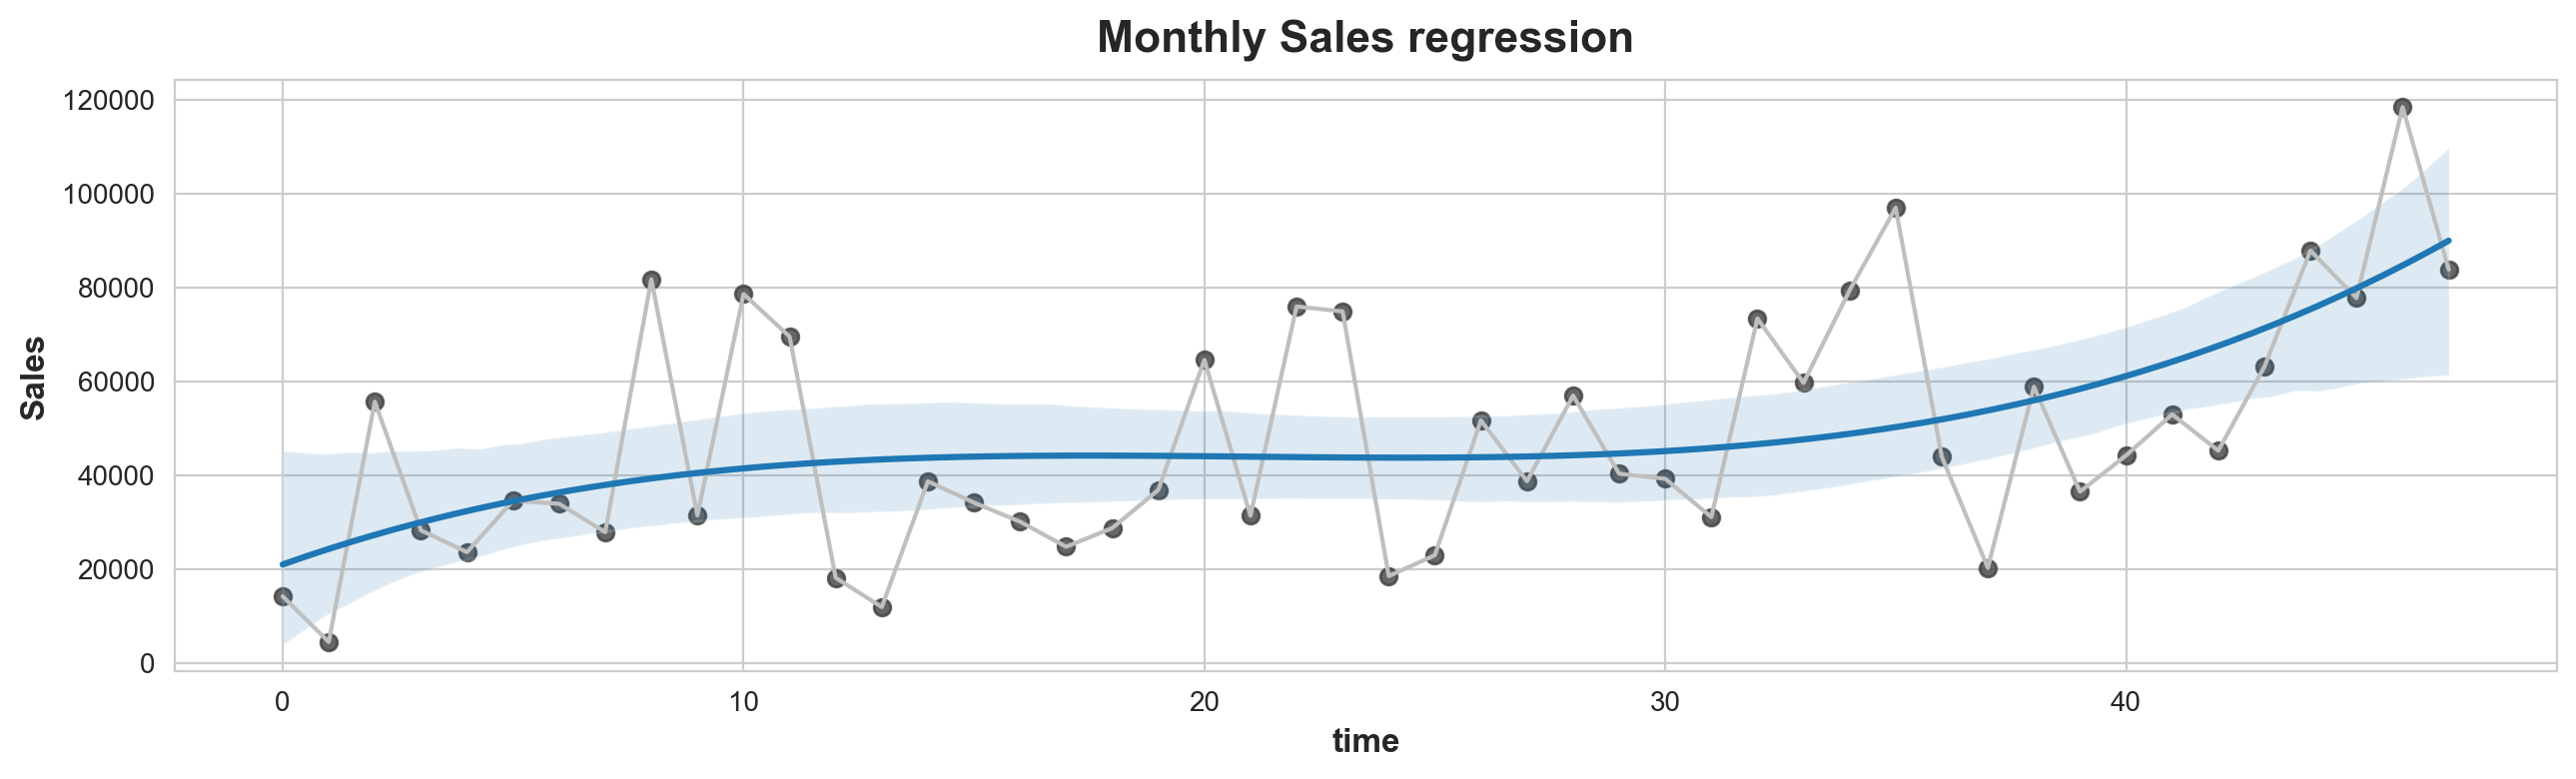

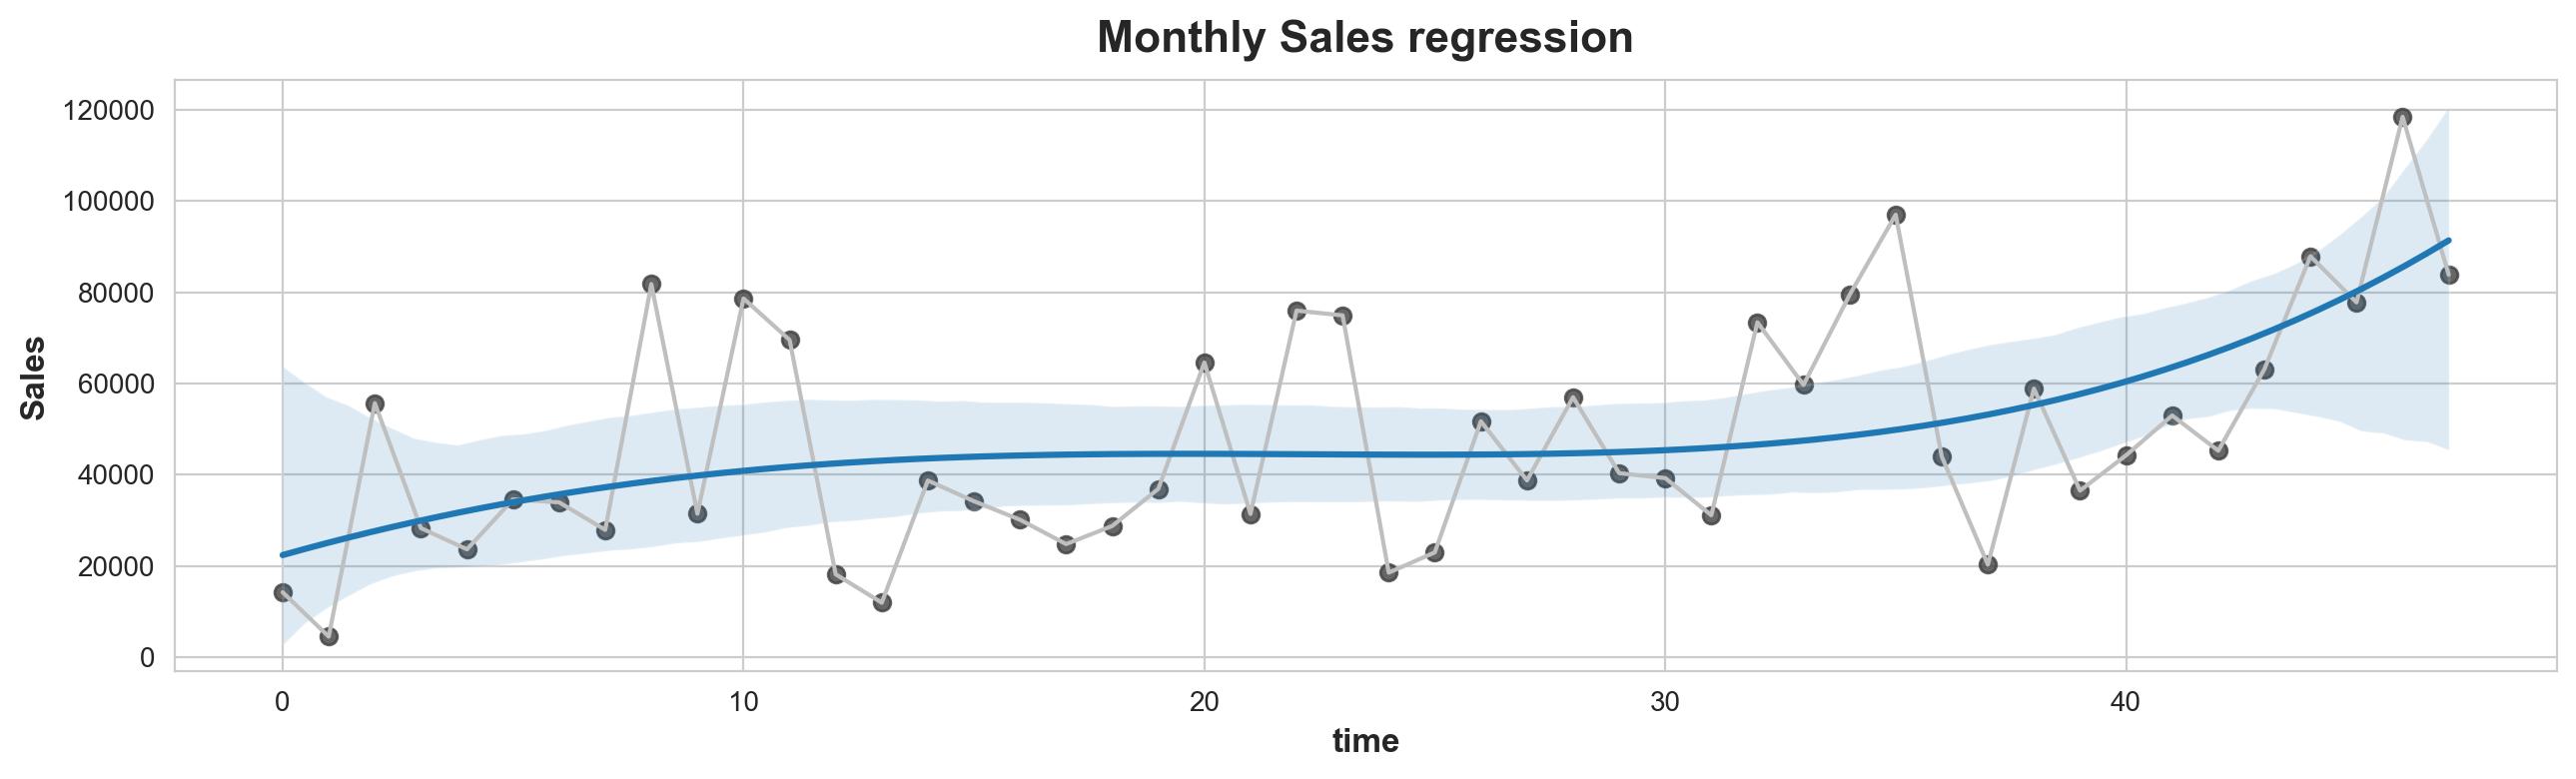

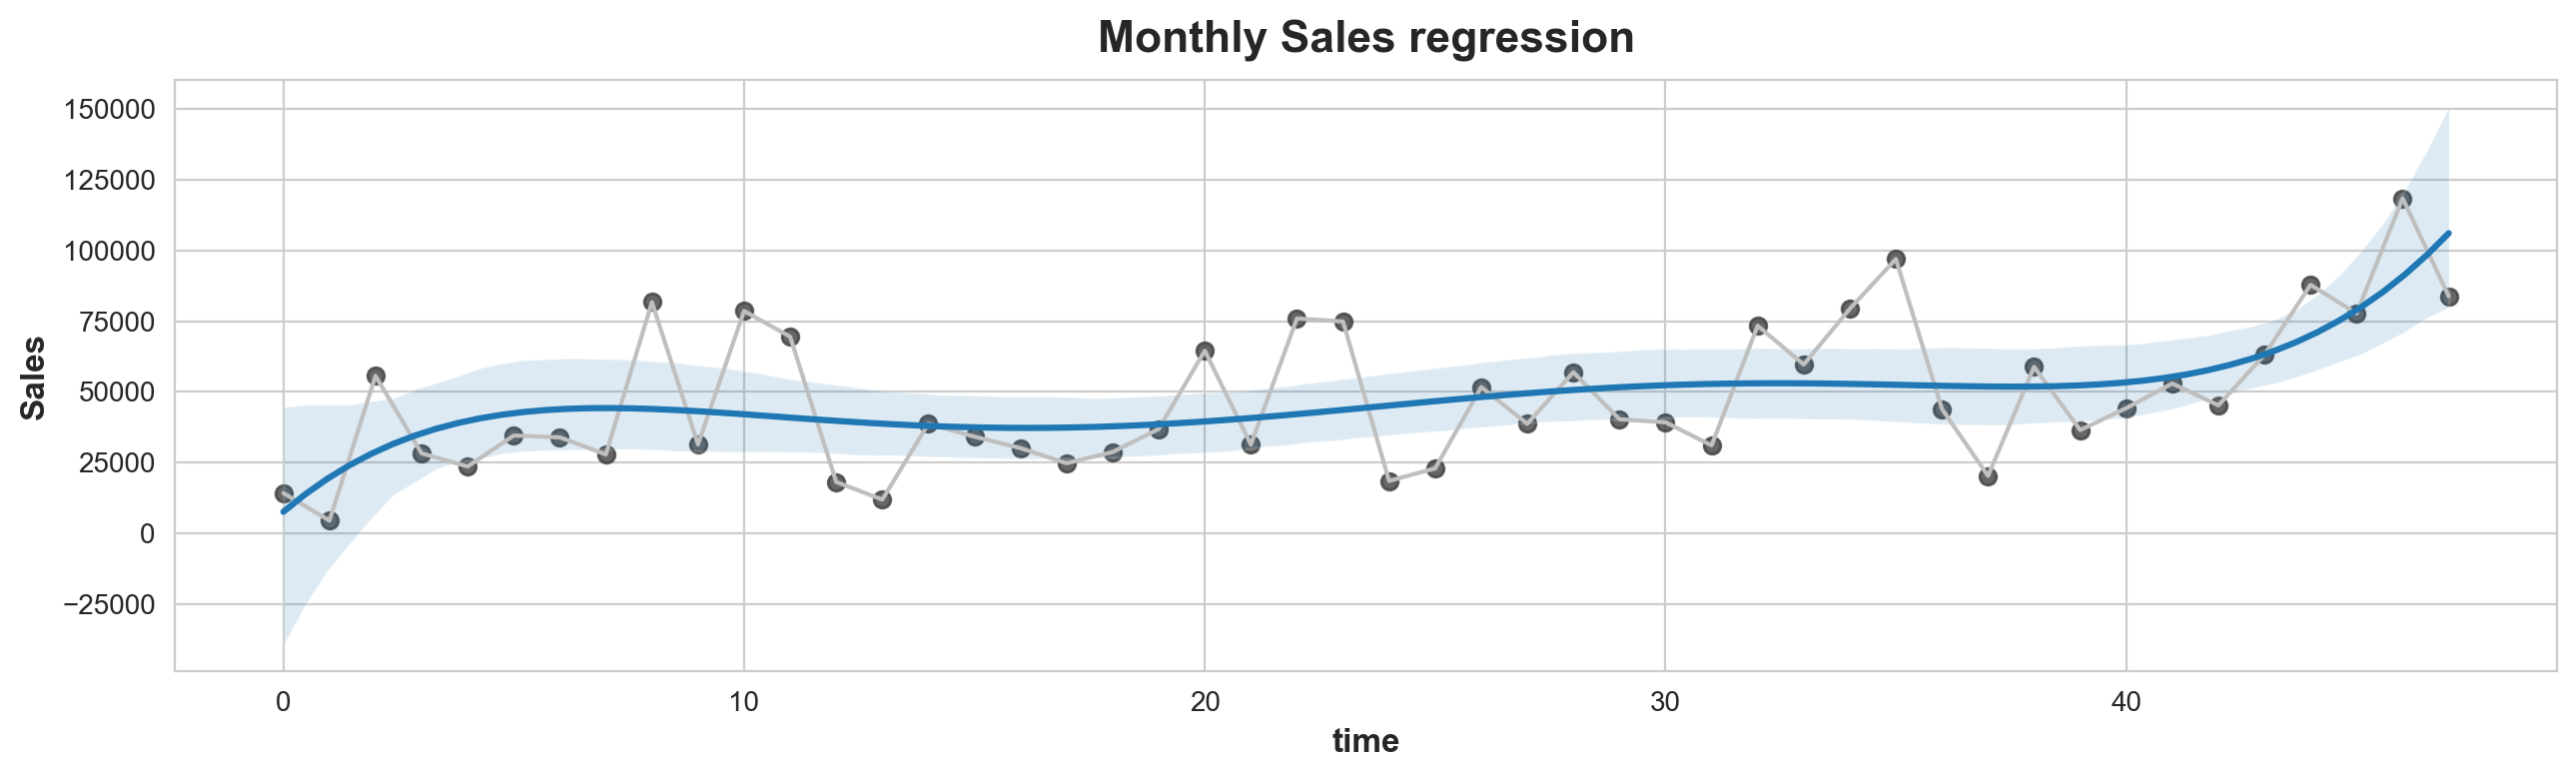

In [36]:
# to plot trend:
# creating a function to plot seaborn regplot for different order
# Using seaborn regplot to visualize linear regression for monthly sales
def plot_trend(order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout = True, figsize= (13,4), titlesize = 18, titleweight = 'bold')
    plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold",titlesize=16,titlepad=10)
    %config InlineBackend.figure_format = 'retina'
    fig, ax = plt.subplots()
    ax.plot(monthly_sales['time'], monthly_sales['Sales'], color='0.75')
    ax = sns.regplot(data=monthly_sales, x='time', y='Sales', scatter_kws=dict(color='0.25'), order=order)
    ax.set_title('Monthly Sales regression'.format(order));
for order in range(1,6):
    plot_trend(order)

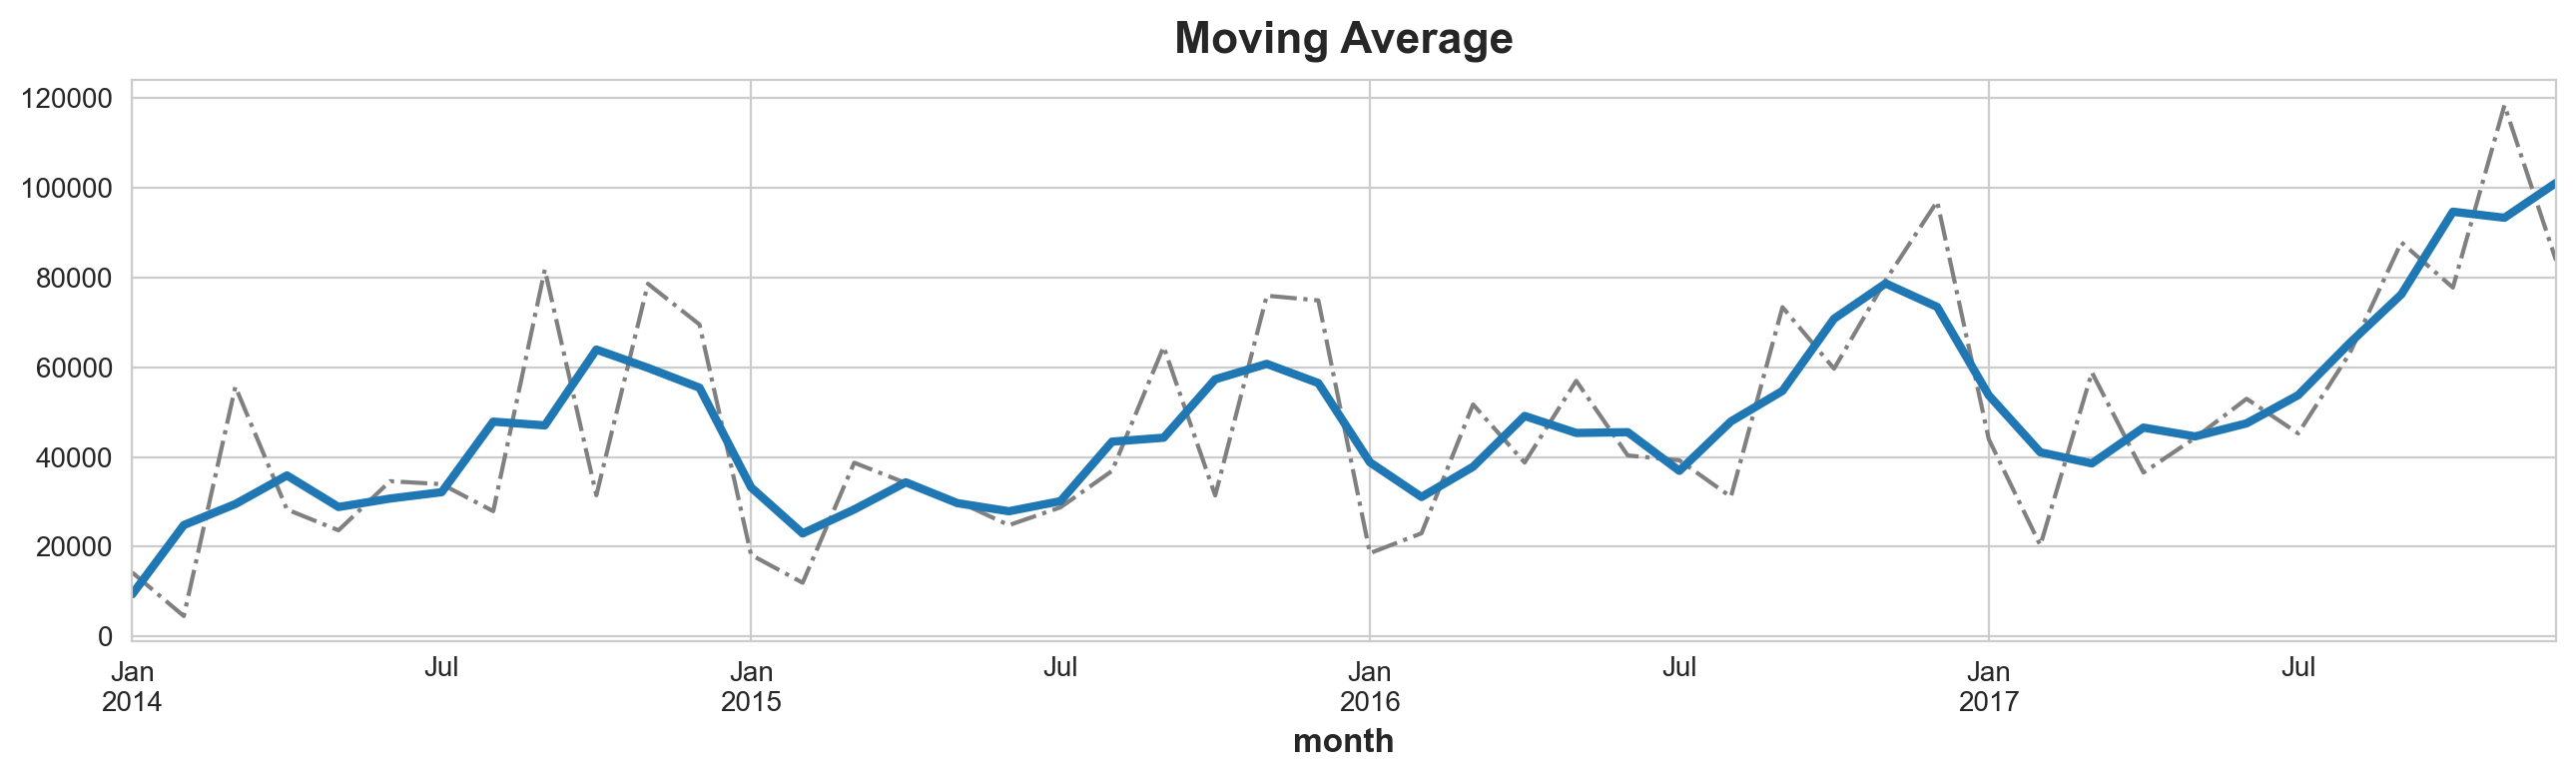

In [24]:
# Using moving average to help visualizing how far the data is from average of 3 months
moving_average = monthly_sales['Sales'].rolling(window = 3, center = True, min_periods=1).mean()
moving_average
ax =monthly_sales['Sales'].plot(style="-.", color="0.5")
ax.set_title('Moving Average');
moving_average.plot( ax =ax, linewidth=3);

In [25]:
from statsmodels.tsa.deterministic  import DeterministicProcess, CalendarFourier

fourier = CalendarFourier(freq = 'M', order =4)
dp = DeterministicProcess(
    index=monthly_sales.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    additional_terms = [fourier],
    seasonal =True,
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()

In [26]:
X.head()

,const,trend,trend_squared,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)"
month,,,,,,,,,,,,,,
2014-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03,1.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04,1.0,4.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-05,1.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Prediction Model 

### Linear Regression 

In [27]:
y = monthly_sales['Sales']
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred1 = pd.Series(model.predict(X_train), index = X_train.index)
y_pred2 = pd.Series(model.predict(X_test), index = X_test.index)
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps = 12)), 
                       index = dp.out_of_sample(steps = 12).index)

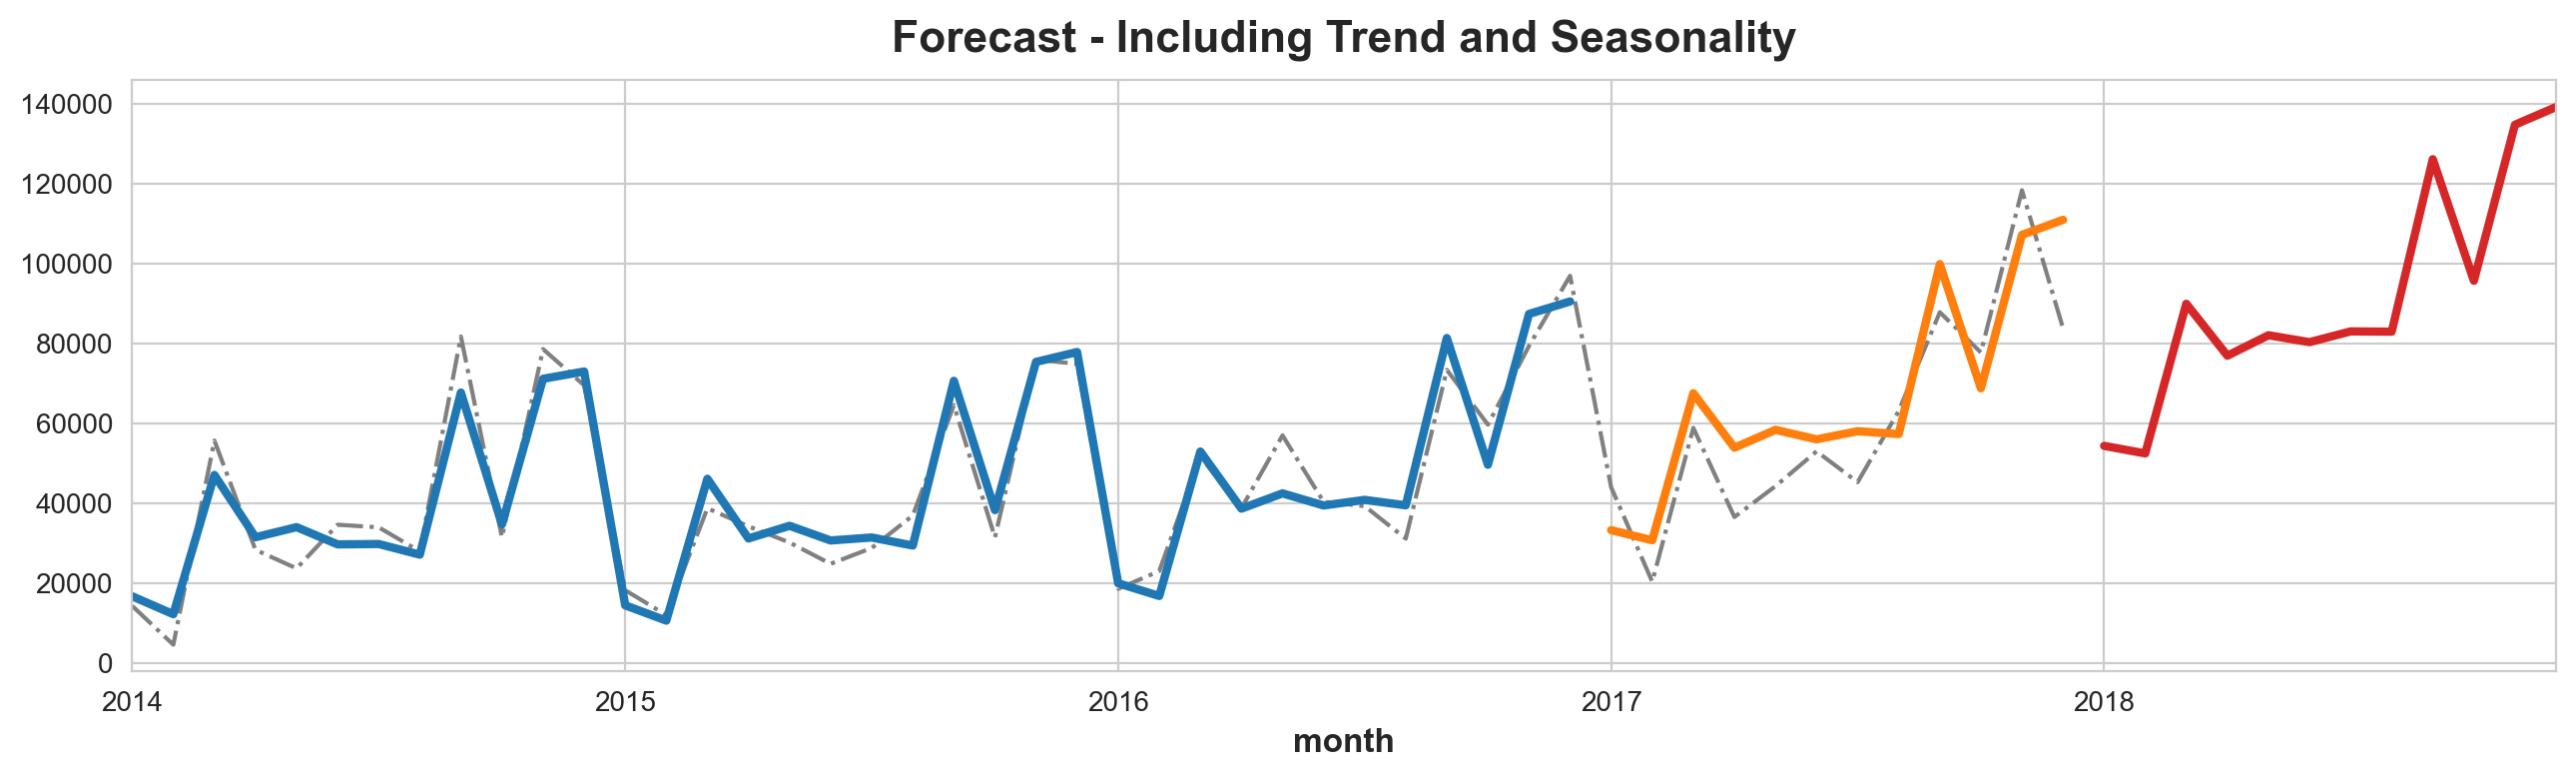

In [28]:
ax = monthly_sales['Sales'].plot(style="-.", color="0.5", title="Forecast - Including Trend and Seasonality")
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2.plot(ax =ax, linewidth=3)
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')

## Model Evaluation 

In [33]:
import statsmodels.api as sm

# Adding a constant term to the predictors
X_test_with_const = sm.add_constant(y_pred2)

# Fitting the model
model = sm.OLS(y_test, X_test_with_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     38.61
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           9.96e-05
Time:                        16:09:27   Log-Likelihood:                -129.42
No. Observations:                  12   AIC:                             262.8
Df Residuals:                      10   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.8462   1.05e+04      0.025      0.9

C:\Users\SACHIN\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
from sklearn.metrics import r2_score
r_squared = r2_score (y_train,y_pred1)
print(r_squared)
print(r2_score (y_test, y_pred2))

0.9234755044099239
0.7368600335716432
